In [ ]:
import pandas as pd
import numpy as np

In [ ]:
data = pd.read_csv('bank.csv')

In [ ]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [ ]:
data.dropna(axis=0, inplace=True)

In [ ]:
x = data.iloc[:, :-1]

In [ ]:
x = pd.get_dummies(x)

In [ ]:
x.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,marital_unknown,education_basic.4y,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown,default_no,default_unknown,housing_no,housing_unknown,housing_yes,loan_no,loan_unknown,loan_yes,contact_cellular,contact_telephone,month_jul,month_jun,month_may,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,1
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,1
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,1,0,1,0,0,0,1
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,1
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,1,0,1,0,0,0,1


In [ ]:
y = pd.get_dummies(data['y'], drop_first=True)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=.3)

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
lr = LogisticRegression(random_state=42)

In [ ]:
lr.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(random_state=42)

In [ ]:
pred_prob = lr.predict_proba(x_test)[:,0]

In [ ]:
pred_prob

array([0.99494822, 0.98571232, 0.99220602, ..., 0.99248216, 0.99364967,
       0.93610358])

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve

In [ ]:
fpr_lr, tpr_lr, threshold_lr = roc_curve(y_test, pred_prob)

In [ ]:
AUC_lr = roc_auc_score(y_test, pred_prob)

In [ ]:
AUC_lr

0.029657581016872

In [ ]:
from sklearn.metrics import auc

In [ ]:
auc(fpr_lr, tpr_lr)

0.029657581016872

In [ ]:
import matplotlib.pyplot as plt

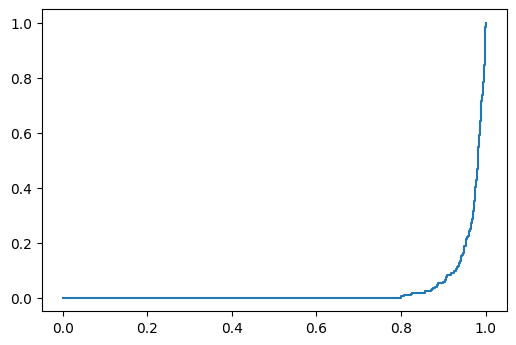

In [ ]:
fig, axes = plt.subplots(dpi=100)
plt.plot(fpr_lr,tpr_lr);

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dtc = DecisionTreeClassifier(random_state=42)

In [ ]:
dtc.fit(x_train,y_train)

DecisionTreeClassifier(random_state=42)

In [ ]:
pred_proba_dtc = dtc.predict_proba(x_test)[:,0]
pred_proba_dtc

array([1., 1., 1., ..., 1., 1., 1.])

In [ ]:
dtc_fpr, dtc_tpr, dtc_threshold = roc_curve(y_test, pred_proba_dtc)

In [ ]:
roc_auc_score(y_test, pred_proba_dtc)

0.32048343386348765

In [ ]:
auc(dtc_fpr, dtc_tpr)

0.32048343386348765

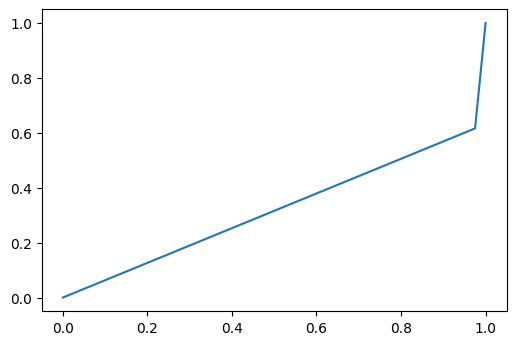

In [ ]:
fig, axes = plt.subplots(dpi=100)
plt.plot(dtc_fpr,dtc_tpr);

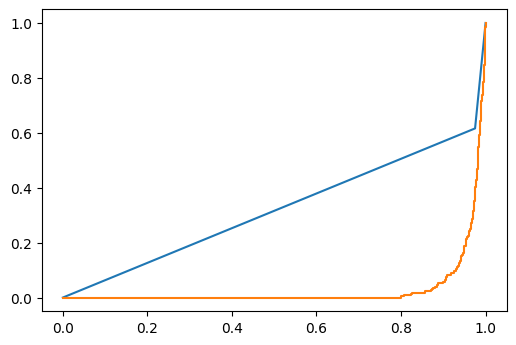

In [ ]:
fig, axes = plt.subplots(dpi=100)
plt.plot(dtc_fpr,dtc_tpr);
plt.plot(fpr_lr,tpr_lr)

In [ ]:
auc(fpr_lr, tpr_lr)